# StandardScaler Method:

## Import Libraries and Load Data:-


In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')

## Explore the Data:-

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [86]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

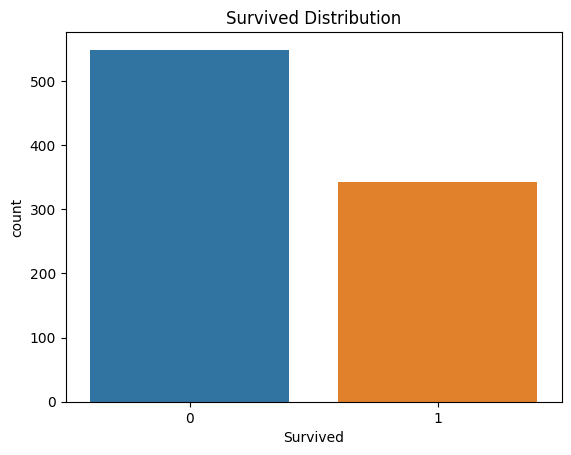

In [87]:
sns.countplot(x='Survived', data=df)
plt.title('Survived Distribution')
plt.show()

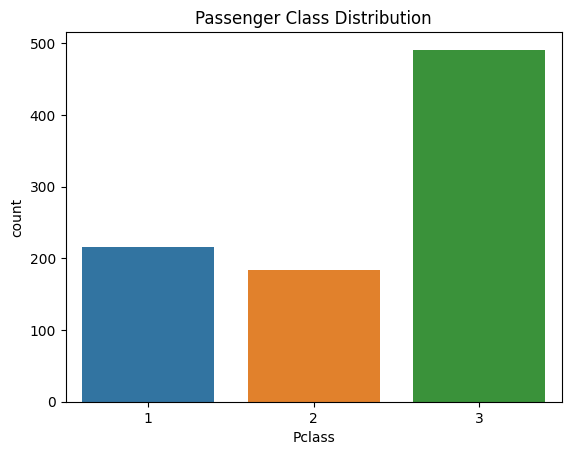

In [88]:
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

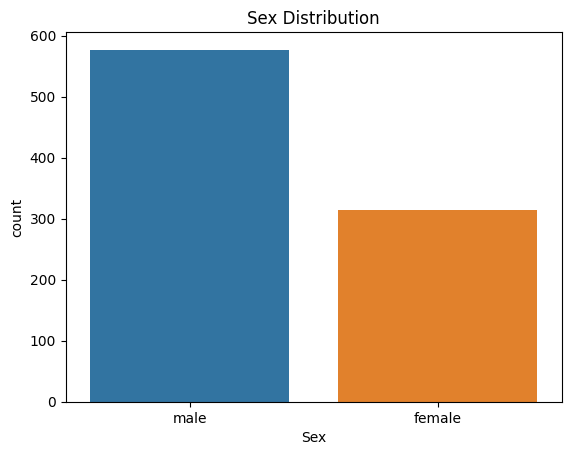

In [89]:
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()

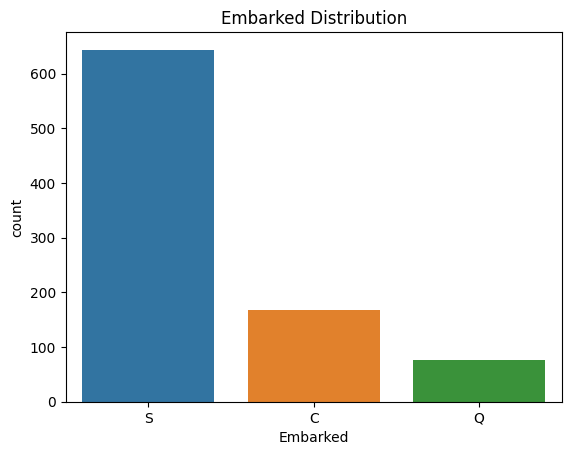

In [90]:
sns.countplot(x='Embarked', data=df)
plt.title('Embarked Distribution')
plt.show()

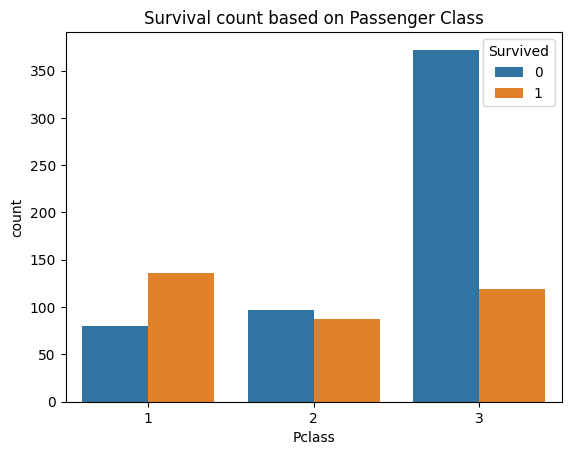

In [91]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival count based on Passenger Class')
plt.show()

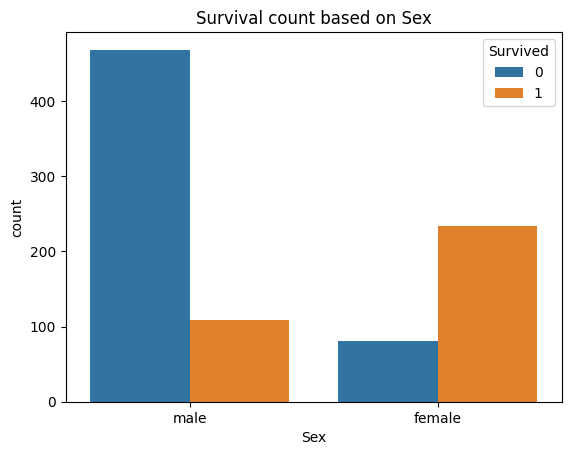

In [92]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival count based on Sex')
plt.show()

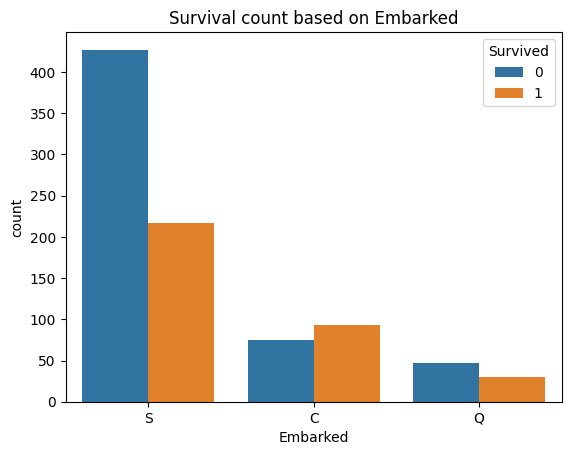

In [93]:
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival count based on Embarked')
plt.show()

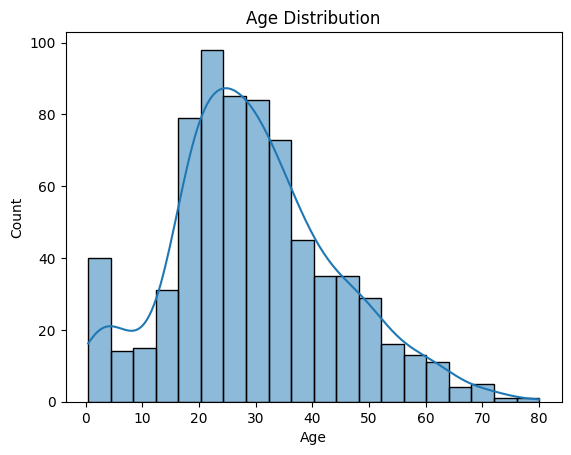

In [94]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

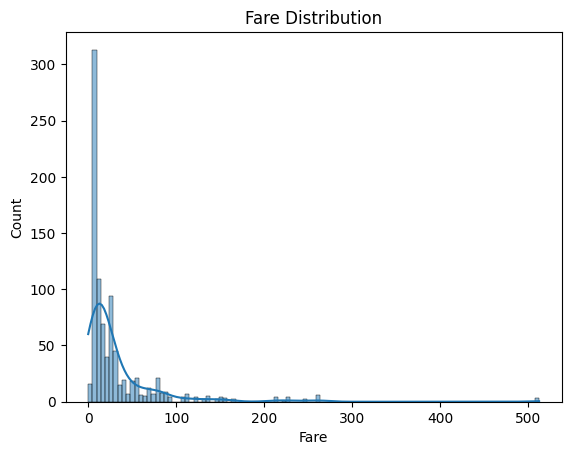

In [95]:
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

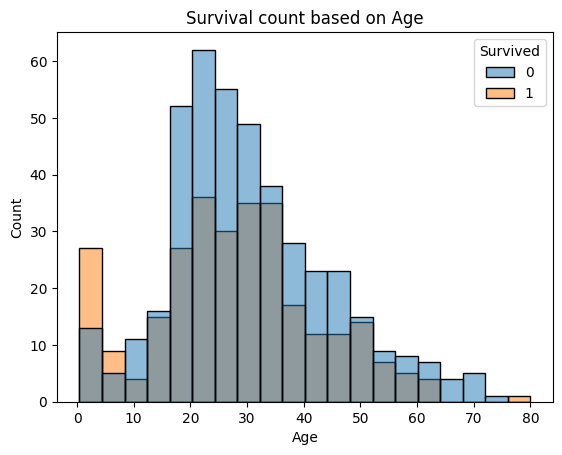

In [96]:
sns.histplot(x='Age', hue='Survived', data=df)
plt.title('Survival count based on Age')
plt.show()

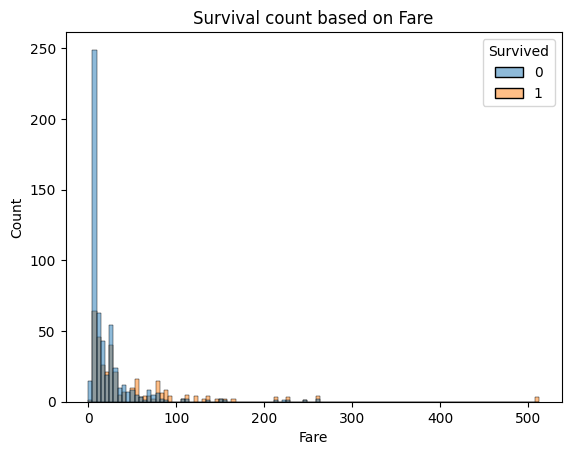

In [97]:
sns.histplot(x='Fare', hue='Survived', data=df)
plt.title('Survival count based on Fare')
plt.show()

## Data Preprocessing:-

In [98]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [99]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [100]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [101]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Split Data into Features and Target:-

In [102]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## Split Data into Training and Testing Sets:-

In [103]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Prediction (Logistic Regression)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [107]:
y_pred = model.predict(X_test_scaled)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8100558659217877

# KNN Classification Method:

## Import Libraries and Load Data:-

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('train.csv')

## Explore the Data:-

In [131]:
# I already done EDA

## Data Preprocessing:-

In [135]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Split Data into Features and Target:-

In [137]:
X = df.drop('Survived', axis=1)
y = df['Survived']

## Split Data into Training and Testing Sets:-

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the Data:-

In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Create and Train the KNN Classifier:-

In [120]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## Make Predictions on the Test Set:-

In [121]:
y_pred = knn_classifier.predict(X_test_scaled)

## Evaluate the Model:-

In [131]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7988826815642458

## Classification Report:-

In [128]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       105\n           1       0.78      0.72      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n'

## Confusion Matrix:-

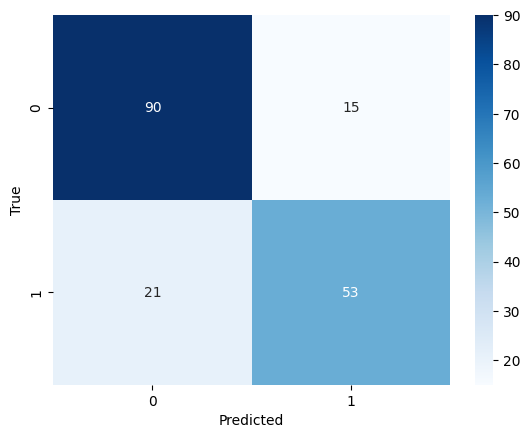

In [130]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()